In [1]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
from scipy import sparse
from scipy import  integrate
import scipy
import pyshtools
import models
sph_harm_operator=models.sph_harm_operator.sph_harm_operator
import pandas as pd
from matplotlib import pylab

# Evolution of Tensor $\mathbf{A}(t)$,  
  
- Relations:  
$$
\mathbf{A}(t)=\iint \mathbf{pp} \psi \mathrm{d}s
$$  
  
- The shear protocols adopt the "preshear-reversal shear" protocols

CPU times: user 36.2 s, sys: 780 ms, total: 37 s
Wall time: 39.8 s


<Axes: title={'center': 'reversal shear, set shear rate $\\dot\\gamma$ = 1 $s^{-1}$'}, xlabel='Time (s)', ylabel='$\\mathbf{A}$ Components'>

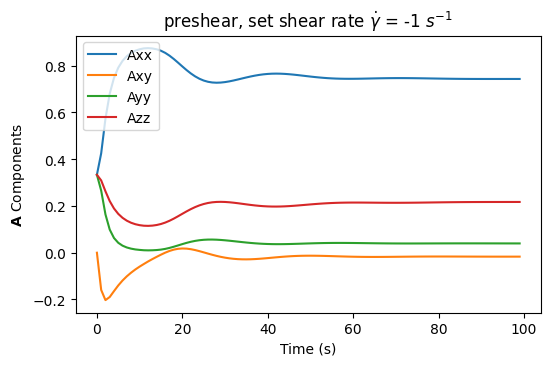

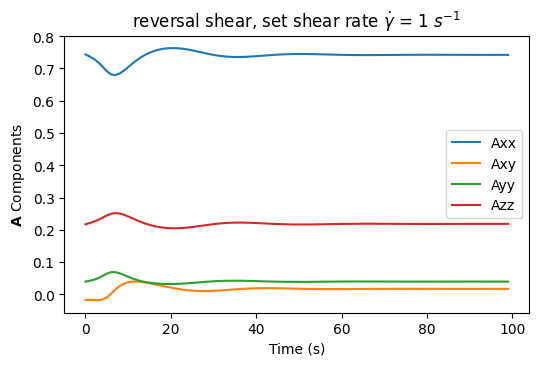

In [2]:
%%time
#set the parameters
#spherical harmonics expansion degrees
degree=60
CI=0.00297
CM=0.8
#kappa in the RSC model
k=1
rho=11.8
time_span=np.linspace(0,100,num=100)
#-----------------------------------------
#set the shear rate as -1 1/s, which mens the preshear
#-----------------------------------------
a0=models.ODF_Sph_Harm(CI=CI,CM=CM,rho=rho,k=k,shear_rate=-1,degree=degree,t_span=time_span)
#calculate the ψ(t), which is stored in res2
res2=a0.run_matrix_type()
df_preshear=pd.DataFrame(res2['A2'], columns=['Axx','Axy','Axz',\
                                            'Ayx','Ayy','Ayz',\
                                            'Azx','Azy','Azz'])
df_preshear.plot(y = ["Axx","Axy","Ayy","Azz"], \
                 title=r'preshear, set shear rate $\dot\gamma$ = -1 $s^{-1}$', figsize=[6,3.6], \
                ylabel = r"$\mathbf{A}$ Components", xlabel = "Time (s)")
#--------------------------------------------
#set the shear rate as 1 1/s, which mens the reversal shear
#--------------------------------------------
init_sphharm_co=res2['sphharm_co'][-1,:,:]
a=models.ODF_Sph_Harm(CI=CI,CM=CM,rho=rho,k=k,shear_rate=1,degree=degree, \
                       t_span=time_span,init_sphharm_co=init_sphharm_co)
#calculate the ψ(t), which is stored in res2
res2=a.run_matrix_type()
df_reversal=pd.DataFrame(res2['A2'], columns=['Axx','Axy','Axz',\
                                            'Ayx','Ayy','Ayz',\
                                            'Azx','Azy','Azz'])
df_reversal.plot(y = ["Axx","Axy","Ayy","Azz"], \
                 title=r'reversal shear, set shear rate $\dot\gamma$ = 1 $s^{-1}$', figsize=[6,3.6], \
                ylabel = r"$\mathbf{A}$ Components", xlabel = "Time (s)")

- Plot orientation distribution $\psi(\mathbf{\theta,\phi})$ in 2D Dimension

(<Figure size 640x704 with 4 Axes>,
 array([<Axes: title={'center': 'Real component'}, xlabel='Longitude', ylabel='Latitude'>,
        <Axes: title={'center': 'Imaginary component'}, xlabel='Longitude', ylabel='Latitude'>],
       dtype=object))

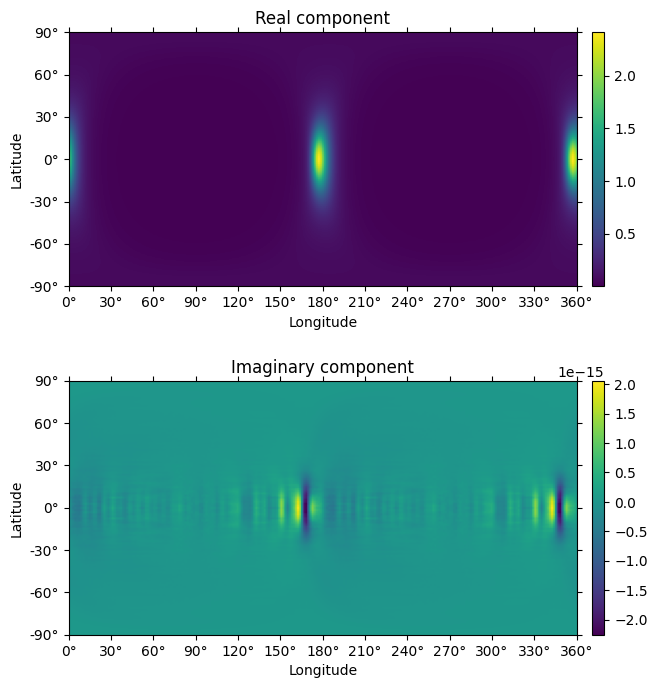

In [3]:
#choose the orientation distribution
psi_clm=a.to_clm(res2['sphharm_co'][24,:,:])
psi_grid=psi_clm.expand()
psi_grid.plot(colorbar='right')

- Plot orientation distribution $\psi(\mathbf{p})$ in 3D Dimension

CPU times: user 2.56 s, sys: 147 ms, total: 2.71 s
Wall time: 2.22 s


(-0.76, 0.76)

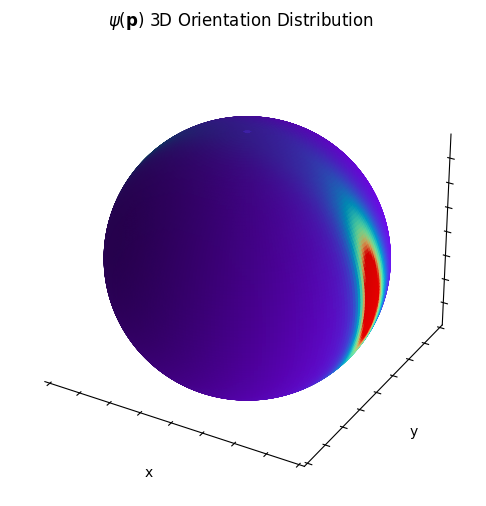

In [4]:
%%time
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
#calculate the Ψ grid by spherical harmonic coefficient
sph_harm_co=res2['sphharm_co'][-1,:,:]
psi_clm=a.to_clm(sph_harm_co)
psi_grid=psi_clm.expand()
#generate the theta mesh and the phi mesh
theta_span=-psi_grid.lats()/180*np.pi+np.pi/2
phi_span=psi_grid.lons()/180*np.pi-np.pi
theta_mesh,phi_mesh=np.meshgrid(theta_span,phi_span,indexing='ij')

#The Cartesian coordinates of the unit sphere
x = np.sin(theta_mesh) * np.cos(phi_mesh)
y = np.sin(theta_mesh) * np.sin(phi_mesh)
z = np.cos(theta_mesh)

#the colors are the psi_grid data, normalized by /2
fcolors = psi_grid.data.real

#Set the aspect ratio to 1 so our sphere looks spherical
fig = pylab.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.rainbow(fcolors))
#Turn off the axis planes
#ax.set_axis_off()
#pylab.show()
ax.grid(False)
#title=r'$C_I$='+str(CI)+r', $C_M$='+str(CM)
title=r"$\psi({\mathbf{p}})$ 3D Orientation Distribution"
ax.set_title(title)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(title)
ax.set_xticklabels([' '])
ax.set_yticklabels([' '])
ax.set_zticklabels([' '])
ax.xaxis.pane.set_facecolor('w')
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_facecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_facecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.set_xlim(left=-1,right=1)
ax.set_ylim(bottom=-1,top=1)
ax.set_zlim(bottom=-0.76,top=0.76)

# Calculate single fibers' trajetory $\mathbf{p}(t)$

CPU times: user 2.33 s, sys: 74.7 ms, total: 2.4 s
Wall time: 3.38 s


<Axes: title={'center': '$\\rho$=11.8; $C_I$=0.00297; $C_M$=0.8; $\\kappa$=1'}, xlabel='Time (s)', ylabel='$\\mathbf{p}(t)$ and $\\theta(t)$, $\\phi(t)$'>

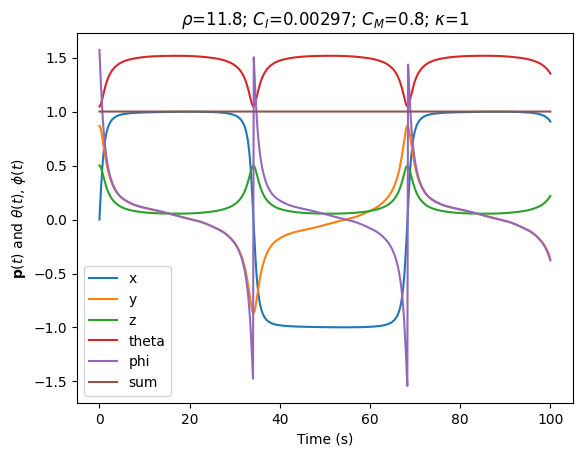

In [5]:
%%time
#set the initial unit vector p0
theta=60/180*np.pi
phi=90/180*np.pi
p0=np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
#calculate the orbit of single fiber by iARD_RSC_ODF's method
df=a.cal_single_fiber_orbit(p0,psi_clm,max_time=100,num=600,max_step=0.5)
df.loc[:,'sum']=np.sqrt(df['x']**2+df['y']**2+df['z']**2)
df.index.name=r"Time (s)"
df.plot(title=r'$\rho$='+str(rho)+r'; $C_I$='+str(CI)+r'; $C_M$='+str(CM)+r'; $\kappa$='+str(k), \
       ylabel = r"$\mathbf{p}(t)$ and $\theta(t)$, $\phi(t)$")

- Plot Trajetory of Single Fiber $\mathbf{p}(t)$ in 3D Dimension

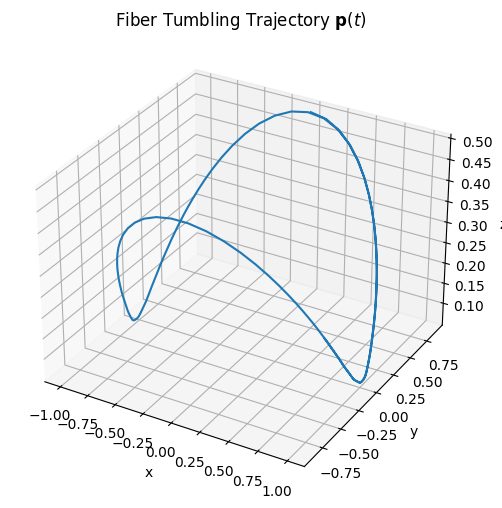

In [6]:
from mpl_toolkits.mplot3d import axes3d
fig = pylab.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_title(r"Fiber Tumbling Trajectory $\mathbf{p}(t)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot(df.x,df.y,df.z)

- Influence of Initial Position $\mathbf{p}(\theta,\phi)$

CPU times: user 11.8 s, sys: 399 ms, total: 12.2 s
Wall time: 17.2 s


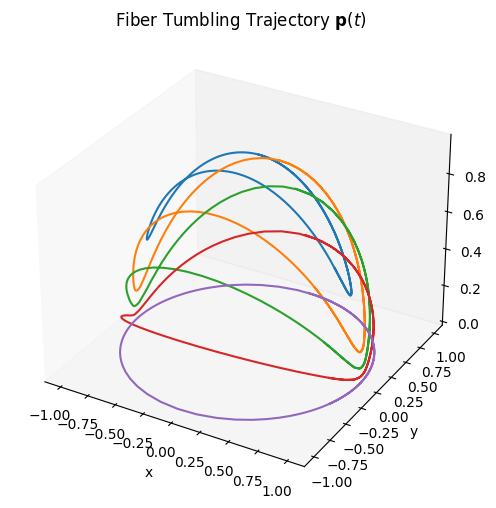

In [7]:
%%time
#--------------------------------------------------------------
#plot the trajetory of the fibers
#--------------------------------------------------------------
from mpl_toolkits.mplot3d import axes3d
fig2 = pylab.figure(figsize=(10,6))
#set the axes for plotting
ax2 = fig2.add_subplot(1,1,1, projection='3d')
ax2.grid(False)
ax2.set_title(r"Fiber Tumbling Trajectory $\mathbf{p}(t)$")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
#period_df_2 restore the trajetory of the fibers 
period_df_2=pd.DataFrame()
thetas=np.array([10,30,50,70,90])/180*np.pi
for theta in thetas:
    phi=90/180*np.pi
    p0=np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
    df=a.cal_single_fiber_orbit(p0,psi_clm,max_time=100,num=600,max_step=0.5)
    #plot the trajetory of a single fiber
    ax2.plot(df.x,df.y,df.z)
    #store the results in the period_df DataFrame
    period_df_2.loc[:,int(theta/np.pi*180)]=df.loc[:,'phi']
#plot the trajetory of the fibers in 2D
#period_df_2.plot(title='rho='+str(a.rho)+';CI='+str(a.CI)+';CM='+str(a.CM)+';k='+str(a.k))

# 2D Orientation Distribution $\psi(\phi)$, in the Gradient-Shear Flow Plane  
- Integration method:  
$$
\psi(\phi)=\int_0^{\pi}\psi(\mathbf{p})\sin\theta \mathrm{d}\theta
$$  
  
- Perform the Gassian Quadrature of the distribution, to get the $\psi(\phi)$ curve, Guassian Quadrature:

$$\int_{-1}^{1} f(x) dx=\sum_{i}^{\infty}w_if(x_i)
$$

CPU times: user 21.7 s, sys: 517 ms, total: 22.2 s
Wall time: 26.1 s


<Axes: title={'center': 'Orientation Distribution $\\psi(\\phi)$ in Gradient-Flow Plane'}, xlabel='$\\phi(rad)$', ylabel='$\\psi(\\phi)$'>

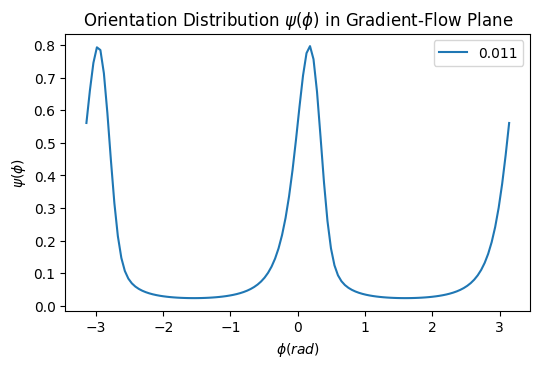

In [8]:
%%time
df3=pd.DataFrame()
for CI in [0.011]:
    #set the parameters of the model 
    degree=60
    rho=100
    CM=0
    k=1
    time_span=np.linspace(0,100,num=100)
    #initial the model class ODF_Sph_Harm
    a=models.ODF_Sph_Harm(CI=CI,CM=CM,rho=rho,k=k,degree=degree,t_span=time_span)
    #calculate the Ψ(t) predicted by the model 
    res2=a.run_matrix_type()

    # calculate the Ψ grid by spherical harmonic coefficient
    sph_harm_co_3=res2['sphharm_co'][-1,:,:]
    psi_clm_3=a.to_clm(sph_harm_co_3)

    #expand in GLQ method to perform the integral
    psi3=psi_clm_3.expand(grid='GLQ')
    #integral the theta, and left phi
    phi3_span=-psi3.lons()/180*np.pi+np.pi
    phi3=np.sum(np.real(psi3.data)*np.tile(psi3.weights,[psi3.nlon,1]).T,axis=0)
    S3=pd.Series(phi3,index=phi3_span)
    #check the volume if equal 1
    #dx=np.pi*2/len(df3)
    #normalized_value=df3.sum()*dx
    df3.loc[:,CI]=S3
df3.plot(figsize=[6,3.6],title = r"Orientation Distribution $\psi(\phi)$ in Gradient-Flow Plane", \
        xlabel = r"$\phi(rad)$", ylabel = r"$\psi(\phi)$")